## Initial EDA

Here we will load in the data and first look at our target variable


In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set()
%matplotlib inline

In [30]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)
    df = df.astype('int32')
    
    #replace 'PAY_0' with 'PAY_1' in order to allign with 'BILL_AMT1' and 'PAY_AMT1'
    df.rename(index=str, columns = {'PAY_0': 'PAY_1'}, inplace=True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [31]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int32
SEX          30000 non-null int32
EDUCATION    30000 non-null int32
MARRIAGE     30000 non-null int32
AGE          30000 non-null int32
PAY_1        30000 non-null int32
PAY_2        30000 non-null int32
PAY_3        30000 non-null int32
PAY_4        30000 non-null int32
PAY_5        30000 non-null int32
PAY_6        30000 non-null int32
BILL_AMT1    30000 non-null int32
BILL_AMT2    30000 non-null int32
BILL_AMT3    30000 non-null int32
BILL_AMT4    30000 non-null int32
BILL_AMT5    30000 non-null int32
BILL_AMT6    30000 non-null int32
PAY_AMT1     30000 non-null int32
PAY_AMT2     30000 non-null int32
PAY_AMT3     30000 non-null int32
PAY_AMT4     30000 non-null int32
PAY_AMT5     30000 non-null int32
PAY_AMT6     30000 non-null int32
dtypes: int32(23)
memory usage: 2.9+ MB


Since every column is an object, we'll have to convert them to a numeric type. We'll use the data dictionary from UCI Machine Learning Repository website as a preliminary data dictionary to guide us.

From the UCI Machine Learning Repository website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1 (LIMIT_BIL): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2 (SEX): (1 = male; 2 = female). 
- X3 (EDUCATION): (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4 (MARITAL STATUS): (1 = married; 2 = single; 3 = others). 
- X5 (AGE): (year). 
- X6 - X11 (PAY_1 : PAY_6): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17 (BILL_AMT1 : BILL_AMT6): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23 (PAY_AMT1 : PAY_AMT6): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- Y: Made a default payment (Yes = 1, No = 0)

## Let's look at the target variable.

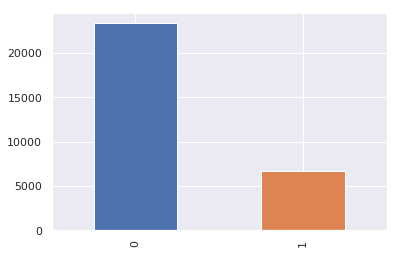

In [33]:
y.value_counts().plot(kind='bar')

There is some inbalance here, so we need to note to do some sort of imbalance handling later in the pipeline.

## Univariate EDA
Now let's look at some univariate plots to get a sense of what our features look like. Looking at the values that some of the features take, we'll look at the features in the following order:

- SEX, EDUCATION, MARRIAGE
- LIMIT_BAL
- AGE
- PAY_0 : PAY_6
- BILL_AMT1 : BILL_AMT6
- PAY_AMT1 : PAY_AMT6

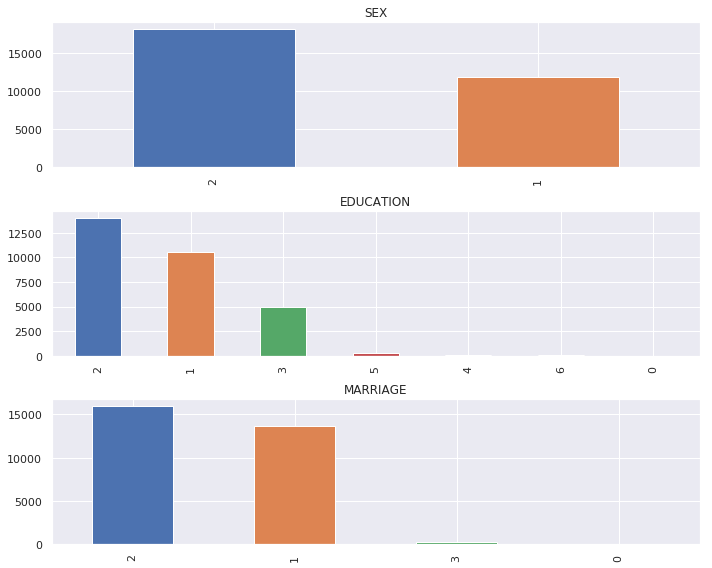

In [34]:
#plot the first grouping of features
custom_df = df.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE']]
fig = plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
ax1 = custom_df['SEX'].value_counts().plot(kind='bar')
ax1.set_title('SEX')

plt.subplot(3,1,2)
ax2 = custom_df['EDUCATION'].value_counts().plot(kind='bar')
ax2.set_title('EDUCATION')

plt.subplot(3,1,3)
ax3 = custom_df['MARRIAGE'].value_counts().plot(kind='bar')
ax3.set_title('MARRIAGE')

plt.tight_layout()
                   
    

Some notes: more females than males in females in the dataset, many more people who went to college than who did not, about an even amount of people who are married vs unmarried. Let's change some of the classes in 'EDUCATION' and 'MARRIAGE' to eleviate some of the unbalance.

First, 'EDUCATION': We'll keep any customer with a Graduate and University education, and group all other values into an 'Other' category to reduce the number of classes and add some balance to the feature.

Next, we'll change 'SEX' values into Male and Female, to make more sense.  

Lastly, we'll change the 'MARRIAGE' feature to a binary feature of just Married or Not Married, to get rid of the miniscule values of the other two classes.

Then, we'll one-hot encode these categorical type features.

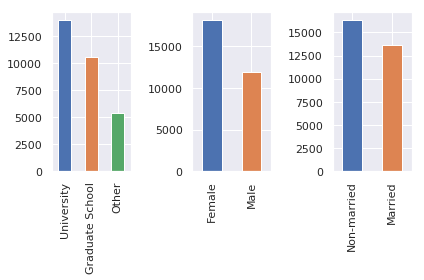

In [35]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})


#plot the value_counts for each feature
plt.subplot(1,3,1)
df['EDUCATION'].value_counts().plot(kind='bar')

plt.subplot(1,3,2)
df['SEX'].value_counts().plot(kind='bar')

plt.subplot(1,3,3)
df['MARRIAGE'].value_counts().plot(kind='bar')

plt.tight_layout()

### One hot encode these new variables


In [52]:
df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,1,1,0


## Quantitative Data

Next, we'll look at the data that is quantitative in nature, or features that have a numerical property to them. First, we look at LIMIT_BAL.

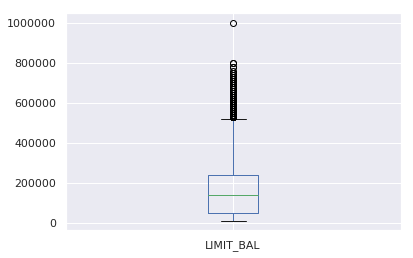

In [53]:
#LIMIT_BAL:

df['LIMIT_BAL'].plot(kind='box')

Notes: right-tailed distribution, has some outliers present. Some transormation may be necessary.

Next, look at the next three variables: SEX, EDUCATION, AND MARRIAGE

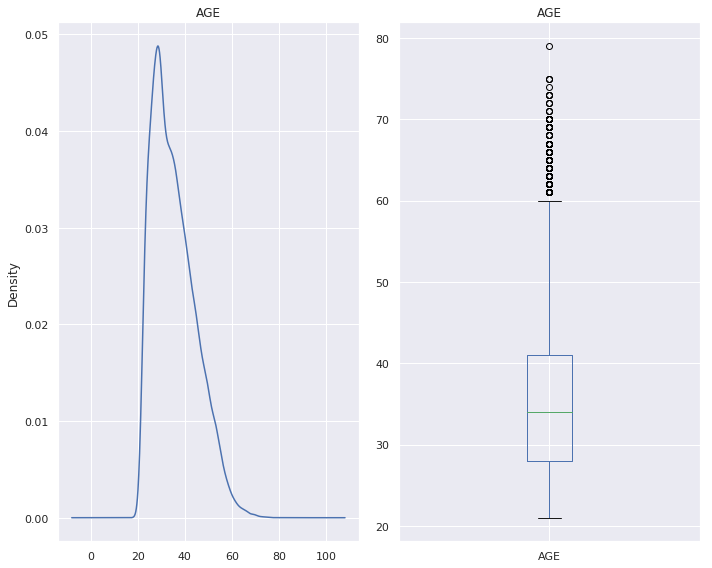

In [54]:

fig = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
ax1 = df['AGE'].plot(kind='density')
ax1.set_title('AGE')

plt.subplot(1,2,2)
ax2 = df['AGE'].plot(kind='box')
ax2.set_title('AGE')

plt.tight_layout()


Some notes: Approaching a gaussian distribution. Just has some older customers that creates a slight right tailed shape. Light massaging needed here.

Next, look at PAY_0 : PAY_6

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 720x576 with 0 Axes>

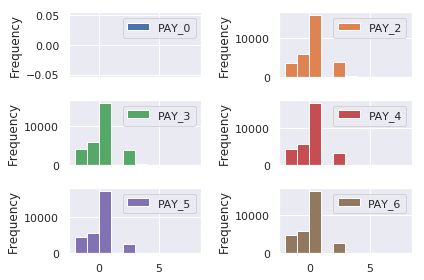

In [55]:
fig = plt.figure(figsize = (10,8))
def payment_history_plot(columns, layout, design):

    df_pay_hist = df.loc[:, columns]

    #fig, ax = plt.subplots(figsize = (10,8), sharex=True)

    
    #for i in range(len(columns)):
        #plt.subplot(3,2,i)
    ax = df_pay_hist.plot(kind = design, subplots = True, layout = layout, sharex=True)
    plt.tight_layout()
    plt.show()
    
payment_history_plot(columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], layout = (3,2), design = 'hist')
        


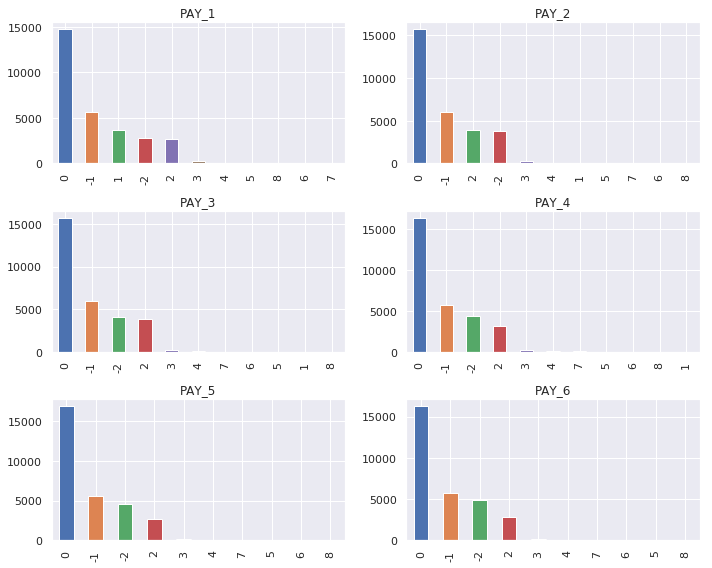

In [56]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
ax1 = df['PAY_1'].value_counts().plot(kind='bar')
ax1.set_title('PAY_1')

plt.subplot(3,2,2)
ax2 = df['PAY_2'].value_counts().plot(kind='bar')
ax2.set_title('PAY_2')


plt.subplot(3,2,3)
ax3 = df['PAY_3'].value_counts().plot(kind='bar')
ax3.set_title('PAY_3')


plt.subplot(3,2,4)
ax4 = df['PAY_4'].value_counts().plot(kind='bar')
ax4.set_title('PAY_4')


plt.subplot(3,2,5)
ax5 = df['PAY_5'].value_counts().plot(kind='bar')
ax5.set_title('PAY_5')


plt.subplot(3,2,6)
ax6 = df['PAY_6'].value_counts().plot(kind='bar')
ax6.set_title('PAY_6')

plt.tight_layout()




Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Might have to bin some of the values together to a bigger value; e.g.  "more than 2 months" class. 

We notice that there are values of -2 within these features. Based on our initial data dictionary, we aren't quite sure what these values are. We will keep them in for now to see how important they might be on subsquent models. Here is code to show where some of these values exist.


In [73]:
df_neg2 = df.loc[df['PAY_1'] == -2]
df_neg2.sample(15, random_state=2019).T

,28559,15505,12744,5752,3166,19082,24114,19421,10397,7651,22254,28238,15258,3440,22187
LIMIT_BAL,450000,360000,500000,250000,150000,450000,280000,500000,200000,200000,200000,360000,360000,320000,90000
AGE,35,27,46,51,28,31,29,35,29,36,27,43,27,50,28
PAY_1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_2,-2,-2,-2,-1,-2,-2,-2,-1,-2,-2,-2,-2,-2,-2,-2
PAY_3,-2,-2,-1,-1,-2,-2,-1,0,-2,-2,-2,-2,-2,-2,-2
PAY_4,-2,-2,0,-1,-2,-2,2,-1,-2,-2,-2,-2,-2,-2,-2
PAY_5,-2,-2,0,0,-2,-2,2,-1,-2,-2,-2,-2,-2,-2,-2
PAY_6,-2,-2,-1,-1,-2,-2,-2,-1,-2,-2,-2,-2,-1,-2,-2
BILL_AMT1,7240,0,28412,179,0,0,-650,5799,0,45810,0,6088,0,6426,1944
BILL_AMT2,1251,0,72222,1533,0,0,-650,36189,0,0,0,17980,750,-4,0


Next, we look at the Bill amounts features.

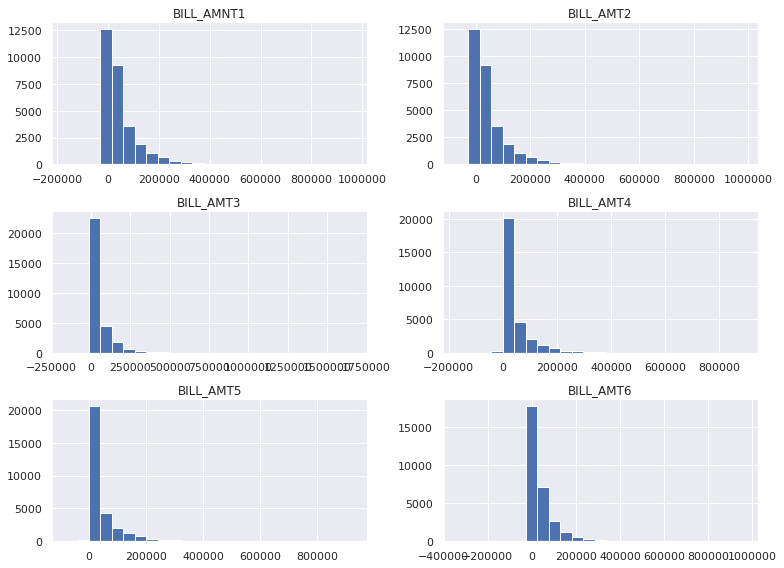

In [61]:
#create bill_amnts group
fig = plt.figure(figsize = (11,8))
bill_amts = df.loc[:, 'BILL_AMT1':'BILL_AMT6']


plt.subplot(3,2,1)
ax1 = bill_amts['BILL_AMT1'].hist(bins=25)
ax1.set_title('BILL_AMNT1')

plt.subplot(3,2,2)
ax2 = bill_amts['BILL_AMT2'].hist(bins=25)
ax2.set_title('BILL_AMT2')

plt.subplot(3,2,3)
ax3 = bill_amts['BILL_AMT3'].hist(bins=25)
ax3.set_title('BILL_AMT3')

plt.subplot(3,2,4)
ax4 = bill_amts['BILL_AMT4'].hist(bins=25)
ax4.set_title('BILL_AMT4')

plt.subplot(3,2,5)
ax5 = bill_amts['BILL_AMT5'].hist(bins=25)
ax5.set_title('BILL_AMT5')

plt.subplot(3,2,6)
ax6 = bill_amts['BILL_AMT6'].hist(bins=25)
ax6.set_title('BILL_AMT6')

plt.tight_layout()





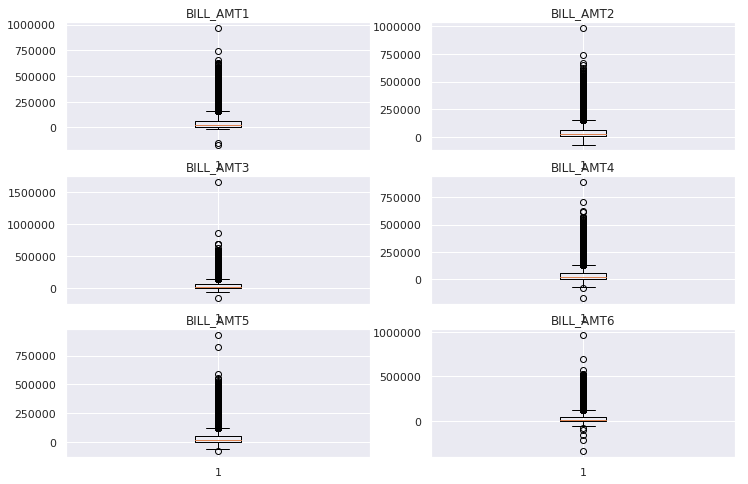

In [62]:
i = 1
plt.figure(figsize=(12,8))
for col in bill_amts:
    plt.subplot(3,2,i)
    plt.boxplot(bill_amts[col])
    plt.title(str(col))
    i +=1

Some notes: most distributions are right tailed, lending itself to a transformation. Strong outliers

Lastly, look at customer's PAY_AMT

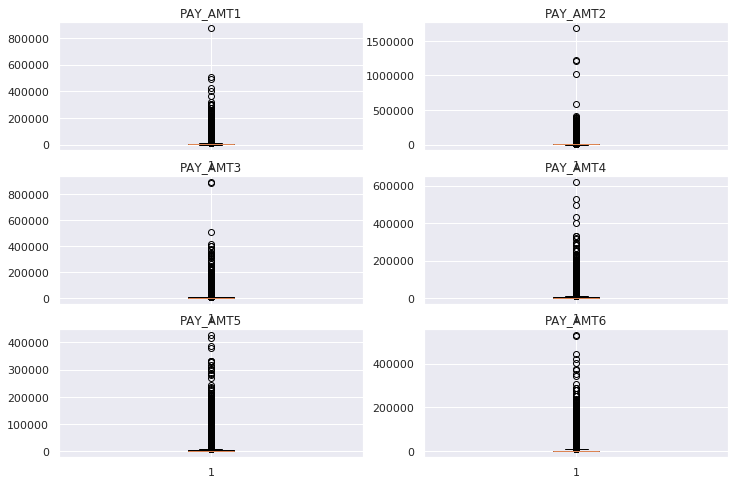

In [64]:
#create pay_amts group
pay_amts = df.loc[:, 'PAY_AMT1' : 'PAY_AMT6']

i = 1
plt.figure(figsize=(12,8))
for col in pay_amts:
    plt.subplot(3,2,i)
    plt.boxplot(pay_amts[col])
    plt.title(str(col))
    i +=1




In [65]:
pay_amts['PAY_AMT2'].sort_values(ascending=False)[:5]

5297     1684259
28004    1227082
28717    1215471
25732    1024516
14514     580464
Name: PAY_AMT2, dtype: int32

Some Notes: these features have very large distribution of values; however,  there are a lot of values at or around 0, and a significant number of very high values, which creates extremely long tails. 

Now, we are going to do a visualize our feature space in two dimensions. We will use Principle Component Analysis in order to reduce our features into two features for visualization purposes. This will help see how our features look in their feature space in a readable way for us humans.

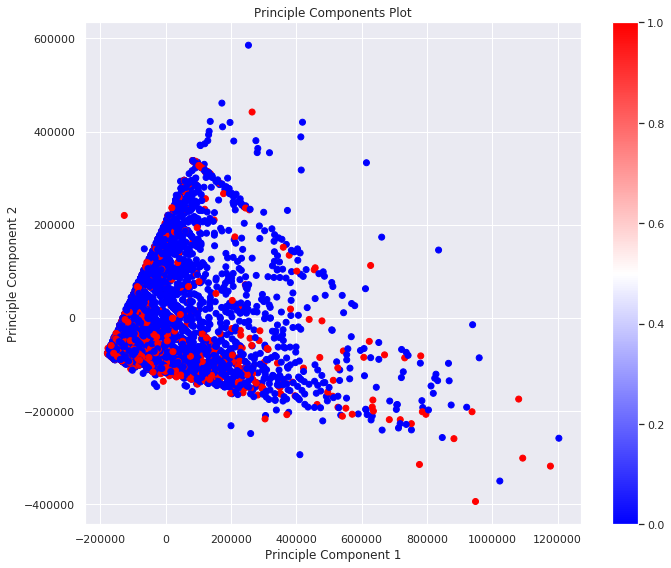

In [72]:
from sklearn.decomposition import PCA

#make copy of our dataframe
#we'll use a random 5000 samples to reduce overloading the image
df_copy = df.sample(5000, random_state = 2019).copy()
y_copy = y.sample(5000, random_state=2019)
df_copy.head()

pca = PCA(n_components = 2, random_state = 2019)

components = pca.fit_transform(df_copy)

plt.figure(figsize=(10,8))
plt.scatter(components[:,0], components[:,1], c = y_copy, cmap = 'bwr')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Principle Components Plot')
plt.colorbar()
plt.tight_layout()





Next, we'll do t-SNE (t-distributed Stochastic Neighbor Embedding) visualization. This technique is also a tool for plotting high dimensional data. 

In [68]:
#from sklearn.manifold import TSNE

#t_components = TSNE(n_components=2).fit_transform(df_copy)

#t_components

KeyboardInterrupt: 